In [0]:
import pandas as pd
import matplotlib.pyplot as plt


## Task 1

In [0]:
data = pd.read_csv("/content/drive/My Drive/Fire_Dataset/fire_nrt_V1_96617.csv")
prop = 0.0001
sample_data = data.sample(int(data.shape[0]*0.1))

### Task 1.1

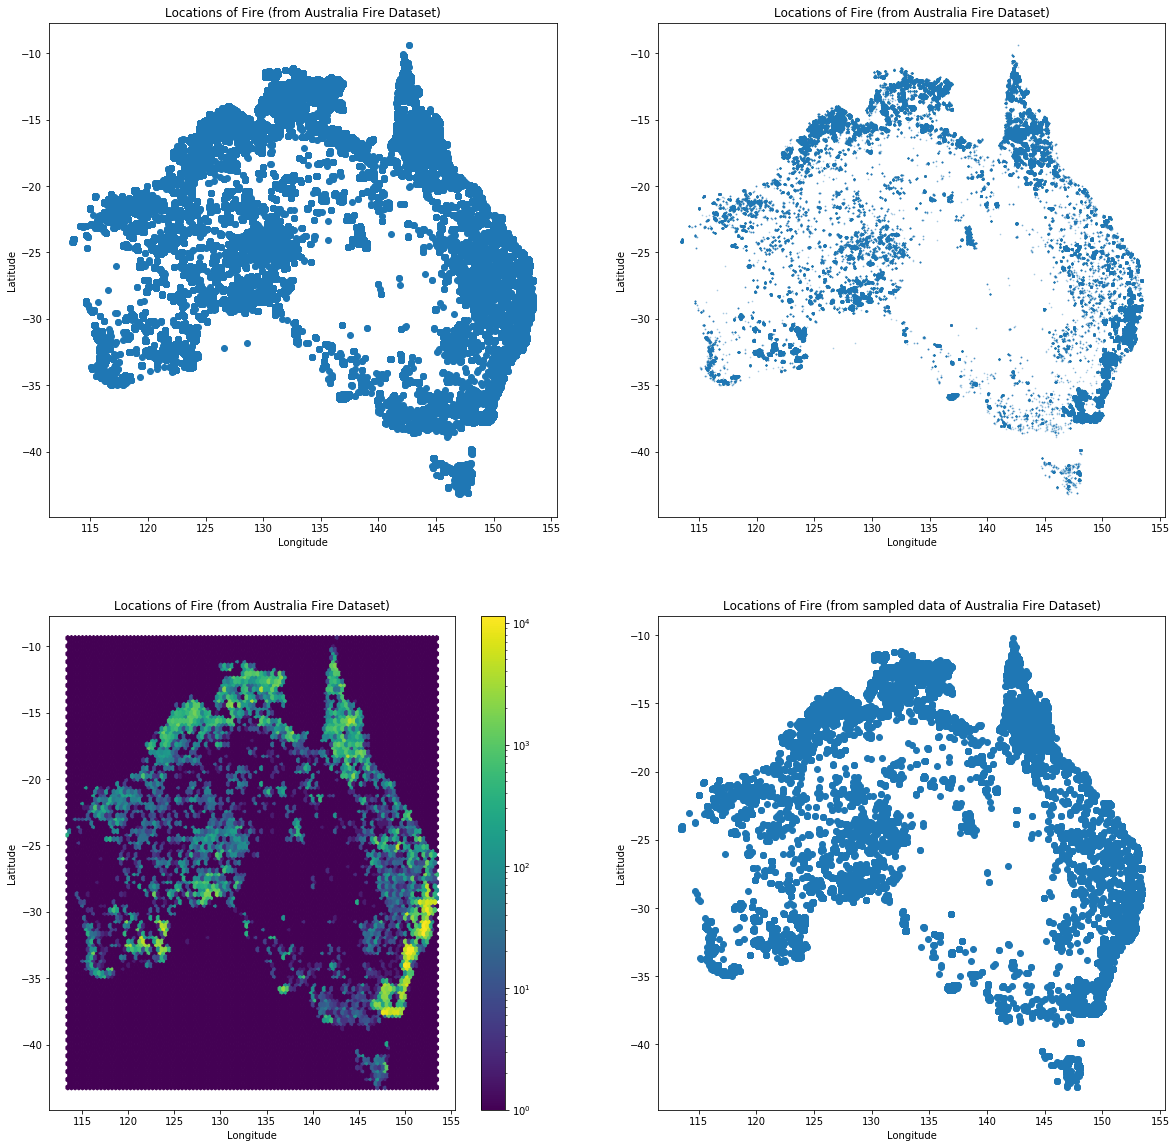

In [4]:
fig, ax = plt.subplots(2,2, figsize = (20, 20))
ax[0,0].scatter(data.loc[:, "longitude"], data.loc[:, "latitude"]);
ax[0,0].set_xlabel("Longitude");
ax[0,0].set_ylabel("Latitude");
ax[0,0].set_title("Locations of Fire (from Australia Fire Dataset)");

ax[0,1].scatter(data.loc[:, "longitude"], data.loc[:, "latitude"], alpha = 0.3, s = 0.5);
ax[0,1].set_xlabel("Longitude");
ax[0,1].set_ylabel("Latitude");
ax[0,1].set_title("Locations of Fire (from Australia Fire Dataset)");

p3 = ax[1,0].hexbin(data.loc[:, "longitude"], data.loc[:, "latitude"], bins = "log");
plt.colorbar(p3, ax=ax[1,0]);
ax[1,0].set_xlabel("Longitude");
ax[1,0].set_ylabel("Latitude");
ax[1,0].set_title("Locations of Fire (from Australia Fire Dataset)");

ax[1,1].scatter(sample_data.loc[:, "longitude"], sample_data.loc[:, "latitude"]);
ax[1,1].set_xlabel("Longitude");
ax[1,1].set_ylabel("Latitude");
ax[1,1].set_title("Locations of Fire (from sampled data of Australia Fire Dataset)");

### Task 1.2

1. The default and sampled scatter plots do not convey much useful information about anomalies.  

2. The scatter plot with customized size and alpha of the markers gives us some idea that majorly the anomalies are located near the north border area, south-east border area and south-west border area.  

3. The heatmap provides the most articulate information about the anomalous regions. It shows that the most anomalous region is south-east border area. 

## Task 2

Visualizing the histogram of all the Brightness temperature I-4 values and the ones where the value is saturated (that is, confidence is 'h')

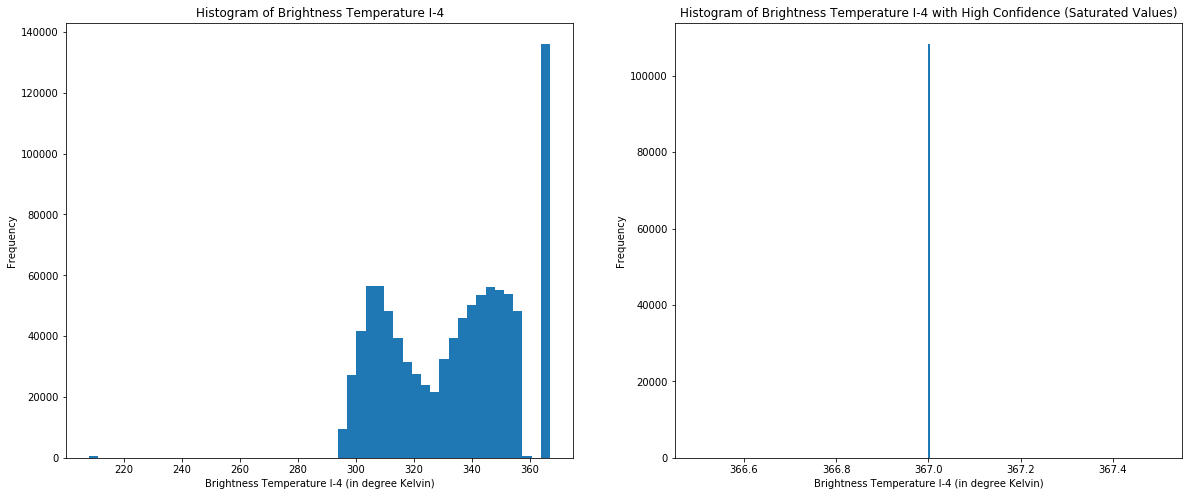

In [5]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
ax[0].hist(data.loc[:, "bright_ti4"], bins = 50);
ax[0].set_xlabel("Brightness Temperature I-4 (in degree Kelvin)");
ax[0].set_ylabel("Frequency");
ax[0].set_title("Histogram of Brightness Temperature I-4");

sat = data[data.confidence == "h"]
ax[1].hist(sat.loc[:, "bright_ti4"], bins = 300);
ax[1].set_xlabel("Brightness Temperature I-4 (in degree Kelvin)");
ax[1].set_ylabel("Frequency");
ax[1].set_title("Histogram of Brightness Temperature I-4 with High Confidence (Saturated Values)");


We can see that all the saturated values are concentrated at 367 degree Kelvin. 

### Task 2.1


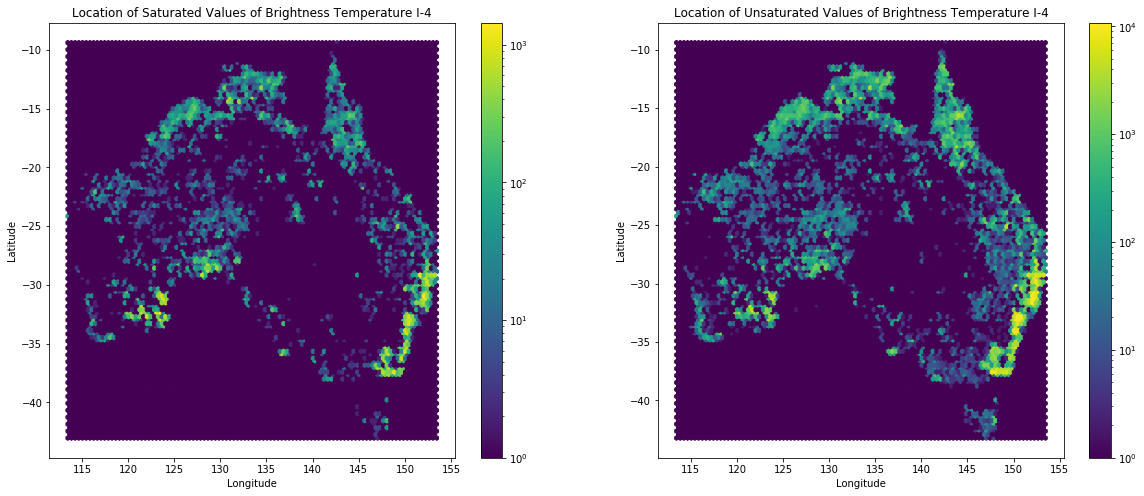

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))

sat = data[data.confidence == "h"]
p1 = ax[0].hexbin(sat.loc[:, "longitude"], sat.loc[:, "latitude"], bins="log");
plt.colorbar(p1, ax=ax[0]);
ax[0].set_xlabel("Longitude");
ax[0].set_ylabel("Latitude");
ax[0].set_title("Location of Saturated Values of Brightness Temperature I-4");

not_sat = data[data.confidence != "h"]
p2 = ax[1].hexbin(not_sat.loc[:, "longitude"], not_sat.loc[:, "latitude"], bins="log");
plt.colorbar(p2, ax=ax[1]);
ax[1].set_xlabel("Longitude");
ax[1].set_ylabel("Latitude");
ax[1].set_title("Location of Unsaturated Values of Brightness Temperature I-4");

Both the plots show that the region with majority of the values is along the south-east border. 

However, there are couple of distinctions:
1. The concentration in case of unsaturated values along south-east border is more than saturated values. The maximum concentration for unsaturated instances is almost 10000 and for saturated instances is almost 1000.
2. In the case of saturated values, the spread and density seems to be lesser than in unsaturated values.
3. The number of points in case of saturated values is almost 1/10th the scale of values in case of unsaturated values.

### Task 2.2

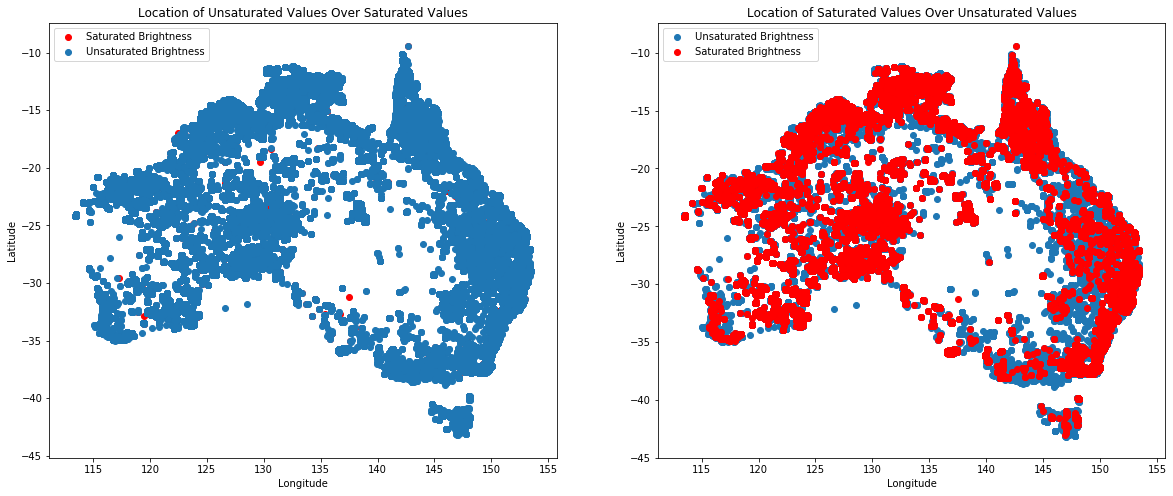

In [7]:
fig, ax = plt.subplots(1,2,figsize=(20, 8));

ax[0].scatter(sat.loc[:, "longitude"], sat.loc[:, "latitude"], color='r', label = "Saturated Brightness");
ax[0].scatter(not_sat.loc[:, "longitude"], not_sat.loc[:, "latitude"], label = "Unsaturated Brightness");
ax[0].set_label("Saturated Brightness");
ax[0].set_label("Unsaturated Brightness");
ax[0].legend();
ax[0].set_xlabel("Longitude");
ax[0].set_ylabel("Latitude");
ax[0].set_title("Location of Unsaturated Values Over Saturated Values");

ax[1].scatter(not_sat.loc[:, "longitude"], not_sat.loc[:, "latitude"], label="Unsaturated Brightness");
ax[1].scatter(sat.loc[:, "longitude"], sat.loc[:, "latitude"], color='r', label="Saturated Brightness");
ax[1].set_label("Saturated Brightness");
ax[1].set_label("Unsaturated Brightness");
ax[1].legend();
ax[1].set_xlabel("Longitude");
ax[1].set_ylabel("Latitude");
ax[1].set_title("Location of Saturated Values Over Unsaturated Values");


1. We can see that unsaturated points are able to cover all the locations of saturated points, but saturated points cannot cover the locations of unsaturated points.
2. This means that unsaturated points are more than saturated points.
3. This also means that unsaturated brightness locations extend to a larger area than saturated points.

### Task 2.3

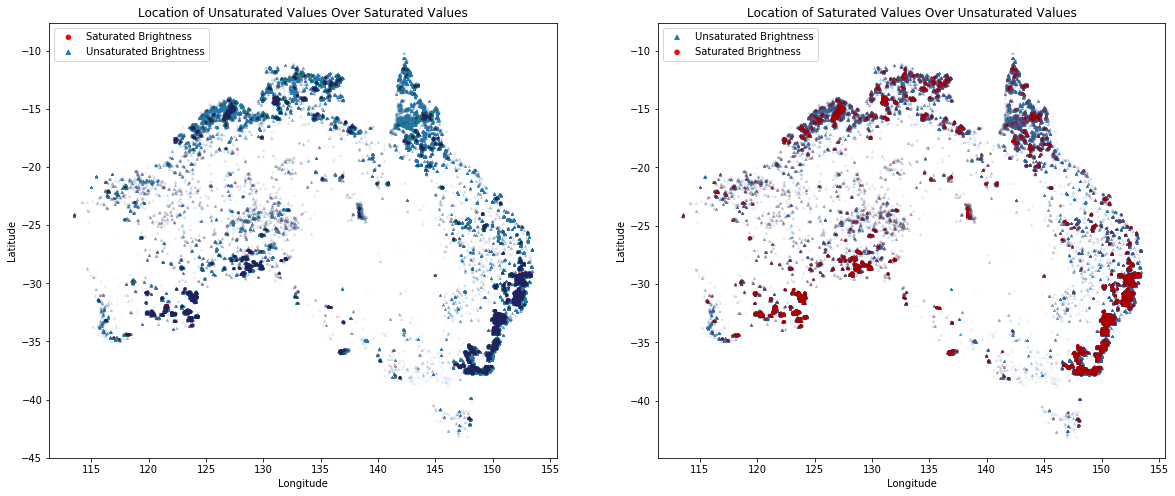

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20, 8));

ax[0].scatter(sat.loc[:, "longitude"], sat.loc[:, "latitude"], color='r', label = "Saturated Brightness", alpha=0.01, s=5);
ax[0].scatter(not_sat.loc[:, "longitude"], not_sat.loc[:, "latitude"], label = "Unsaturated Brightness", alpha=0.01, s=5, marker="^");
ax[0].set_label("Saturated Brightness");
ax[0].set_label("Unsaturated Brightness");
ax[0].legend();
for lh in ax[0].legend().legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([20,20])
ax[0].set_xlabel("Longitude");
ax[0].set_ylabel("Latitude");
ax[0].set_title("Location of Unsaturated Values Over Saturated Values");

ax[1].scatter(not_sat.loc[:, "longitude"], not_sat.loc[:, "latitude"], label="Unsaturated Brightness", alpha=0.01, s=5, marker="^");
ax[1].scatter(sat.loc[:, "longitude"], sat.loc[:, "latitude"], color='r', label="Saturated Brightness", alpha=0.01, s=5);
ax[1].set_label("Saturated Brightness");
ax[1].set_label("Unsaturated Brightness");
ax[1].legend();
for lh in ax[1].legend().legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([20,20])
ax[1].set_xlabel("Longitude");
ax[1].set_ylabel("Latitude");
ax[1].set_title("Location of Saturated Values Over Unsaturated Values");

By changing the marker style, size and alpha, we can visualize the data better. 

We can see in the left plot that there are generally unsaturated values represented by blue, but the unsaturated values are higlighted where the color turns dark blue.

In the right plot, we can see that the points are generally dark red, instead of red, showing that high density of blue unsaturated points are underneath it. We can see a lot of blue points as well, suggesting lesser density of saturated points at those locations.